In [7]:
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import seaborn as ss
from manager.data import DataManager
from factory.classfication_factory import ClassificationFactory
from factory.regression_factory import RegressionFactory
from constants.classification_models import ClassificationModels
from constants.regression_models import RegressionModels



In [10]:
data_manager = DataManager(min_sample_label=10)

data, x_train, x_val, t_train, t_val, = data_manager.get_data()

accorderie = [[633, 6865, 10, 0, 0.02, 4.04, 0.05, 4.86, 0.06, 75.33]]

In [23]:
print(data.corr().fillna(0))

                        Vertices  Edges  Diameter    Radius  Density   
Vertices                     0.0    0.0  0.000000  0.000000      0.0  \
Edges                        0.0    0.0  0.000000  0.000000      0.0   
Diameter                     0.0    0.0  1.000000 -0.128749      0.0   
Radius                       0.0    0.0 -0.128749  1.000000      0.0   
Density                      0.0    0.0  0.000000  0.000000      0.0   
Average path lenght          0.0    0.0  0.645132 -0.038067      0.0   
Reciprocity                  0.0    0.0  0.058183 -0.130728      0.0   
Eccentricity                 0.0    0.0  0.859727 -0.086567      0.0   
Clustering coefficient       0.0    0.0  0.184628 -0.146837      0.0   
Edge betweenness             0.0    0.0  0.322393  0.063045      0.0   
target1                      0.0    0.0  0.202534 -0.154266      0.0   
target2                      0.0    0.0 -0.703112  0.187600      0.0   
target3                      0.0    0.0  0.010329 -0.004968     

<Axes: >

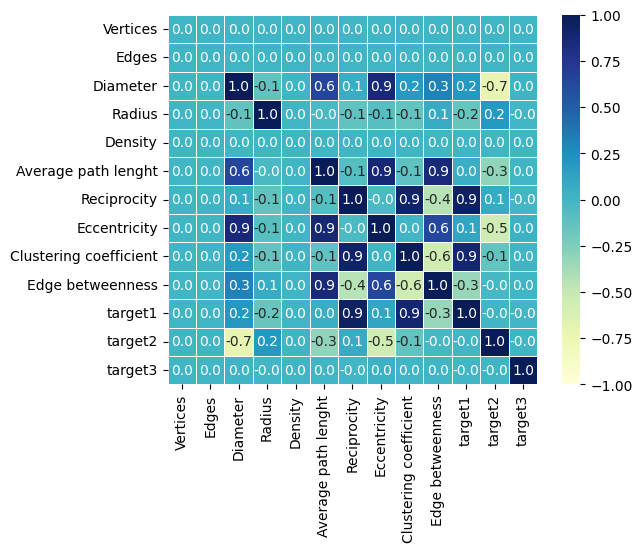

In [52]:
ss.heatmap(data.corr().fillna(0), cmap="YlGnBu", annot=True, vmin=-1, vmax=1,linewidths=.5, cbar=True, square=True, fmt='.1f')

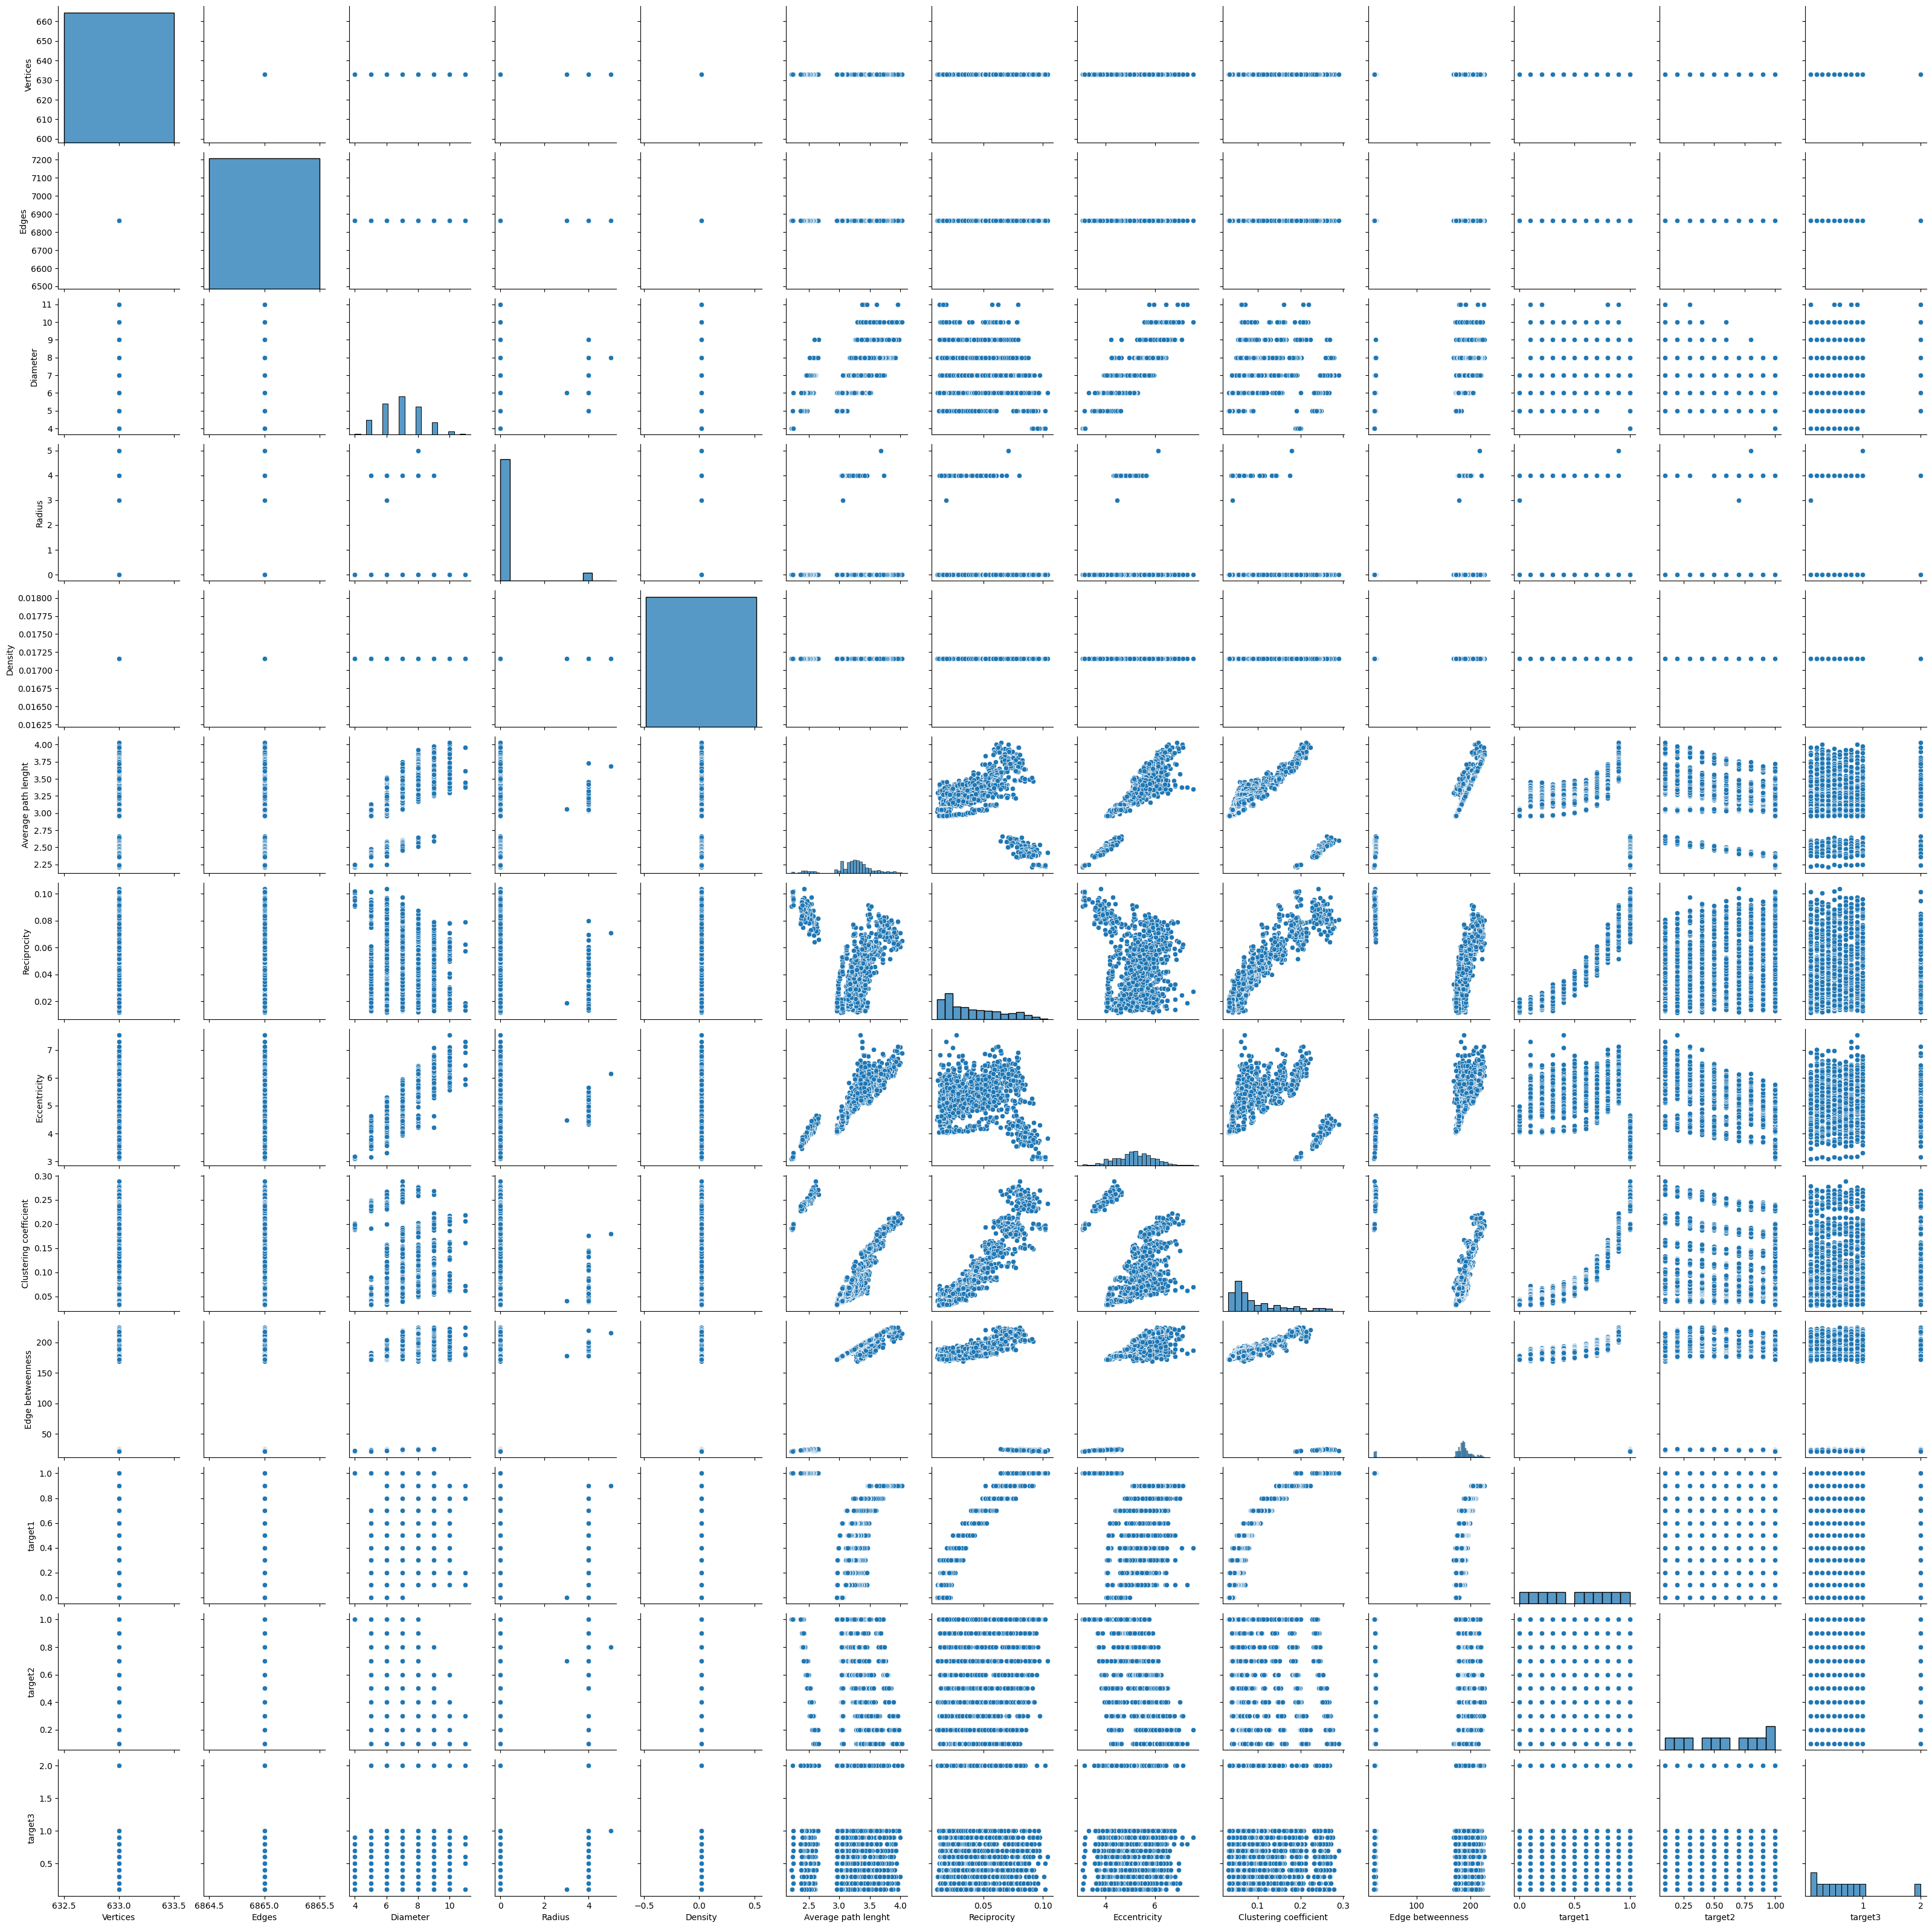

In [53]:
ss.pairplot(data)

(1331, 3)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


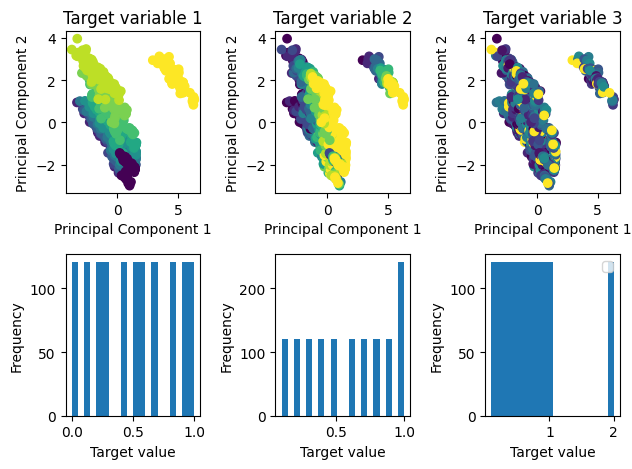

In [87]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

pca = PCA(n_components=2)
X = data.iloc[:,:-3]
y = data.iloc[:, -3:]

X = StandardScaler().fit_transform(X)

X_pca = pca.fit_transform(X)

columns = y.shape[1]
print(y.shape)
fig, axes = plt.subplots(2, columns)
print()
for i in range(columns):
    axes[0, i].scatter(X_pca[:,0], X_pca[:,1], c=y.iloc[:,i], label=np.unique(y.iloc[:,i]))
    axes[0, i].set_xlabel("Principal Component 1")
    axes[0, i].set_ylabel("Principal Component 2")
    axes[0, i].set_title(f"Target variable {i+1}")
    
    axes[1, i].hist(y.iloc[:, i], bins=20)
    axes[1, i].set_xlabel("Target value")
    axes[1, i].set_ylabel("Frequency")
    
fig.tight_layout()
plt.legend()
plt.show()


In [ ]:
print(x_train.shape,t_train.shape,  x_val.shape,  t_val.shape)

In [ ]:
model = RegressionFactory.get_model(RegressionModels.ELASTIC_NET)

model.train(x_train=x_train,x_val=x_val,t_train=t_train,t_val=t_val)
model.predict(x_val=accorderie)